# Perform PCA on the Food Nutrient Matrix to reduce data size

Goals:

Take the matrix generated in a prior notebook and perform PCA to reduce data size.

In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
# csv paths
nutrient_matrix_data_p = r"../data/"

nutrient_matrix_csv_p = nutrient_matrix_data_p + "nutrients_matrix.csv.gz"

nutrient_matrix_pca_csv_p = nutrient_matrix_data_p + "nutrients_matrix_pca.csv.gz"

#### Import the data cleaned in another notebook. Set the NDB Number to the index.

In [4]:
nutrients_matrix = pd.read_csv(nutrient_matrix_csv_p)
nutrients_matrix.set_index("fdc_id", inplace = True)
print(nutrients_matrix.shape)
nutrients_matrix.head()

(1590701, 103)


,1003,1004,1005,1008,1079,1082,1084,1087,1089,1092,...,1099,1196,1316,1233,1112,1111,1273,1236,1080,1068
fdc_id,,,,,,,,,,,,,,,,,,,,,
344604,0.81,0.41,4.07,24.0,0.8,0.0,0.0,13.0,0.00,179.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
344605,0.81,0.41,4.07,24.0,0.8,0.0,0.0,16.0,0.00,179.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
344606,23.21,2.68,0.00,0.0,0.0,0.0,0.0,0.0,1.29,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
344607,23.21,2.68,0.00,0.0,0.0,0.0,0.0,0.0,1.29,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
344608,18.75,15.18,0.00,0.0,0.0,0.0,0.0,18.0,0.96,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Create scaled version of the data

In [5]:
standard_scaler = StandardScaler()
standard_scaler.fit(nutrients_matrix)
nutrients_standard_scaled = standard_scaler.transform(nutrients_matrix)

In [6]:
nutrients_standard_scaled.shape

(1590701, 103)

#### Do PCA on all datasets

In [7]:
pca = PCA(n_components=.90)
pca.fit(nutrients_standard_scaled)

PCA(n_components=0.9)

In [8]:
nutrients_pca = pca.transform(nutrients_standard_scaled)
nutrients_pca = pd.DataFrame(nutrients_pca, index = nutrients_matrix.index)
print(nutrients_pca.shape)
nutrients_pca.head()

(1590701, 65)


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
fdc_id,,,,,,,,,,,,,,,,,,,,,
344604,-0.007552,-1.400151,0.097258,0.045458,0.049453,0.019196,0.163201,-0.003585,0.035777,0.024830,...,-0.026410,0.041591,-0.004853,-0.019035,0.001287,-0.024380,0.006185,-0.006895,-0.010728,0.024357
344605,-0.007552,-1.400148,0.097258,0.045458,0.049453,0.019196,0.163199,-0.003584,0.035780,0.024831,...,-0.026415,0.041571,-0.004857,-0.019031,0.001289,-0.024398,0.006096,-0.006882,-0.010721,0.024363
344606,-0.002998,-0.924938,0.061935,0.113642,0.035358,0.025363,0.327843,0.015355,0.289016,-0.068408,...,-0.069557,0.139652,-0.005474,-0.047251,0.097320,-0.025371,0.015223,-0.005454,0.008299,-0.057664
344607,-0.002998,-0.924938,0.061935,0.113642,0.035358,0.025363,0.327843,0.015355,0.289016,-0.068408,...,-0.069557,0.139652,-0.005474,-0.047251,0.097320,-0.025371,0.015223,-0.005454,0.008299,-0.057664
344608,-0.004066,-0.694697,0.045839,0.075089,0.037210,0.050376,0.591255,0.013635,0.124902,-0.024720,...,-0.007984,0.041261,0.000803,-0.011797,0.103713,0.050000,-0.010583,-0.018607,-0.064377,-0.039917


In [9]:
nutrients_pca.to_csv(nutrient_matrix_pca_csv_p, 
                   index = True, compression = "gzip")

#### Analyze the variance of the PCs

In [10]:
df_variance = pd.DataFrame(pca.explained_variance_ratio_, columns = ['variance'])
df_variance['cum_percent'] = 100*(df_variance.variance.cumsum())
df_variance

,variance,cum_percent
0,0.143308,14.330763
1,0.032616,17.592386
2,0.031427,20.735091
3,0.027771,23.512191
4,0.027547,26.266939
...,...,...
60,0.009543,86.392462
61,0.009504,87.342884
62,0.009387,88.281573
63,0.009276,89.209198


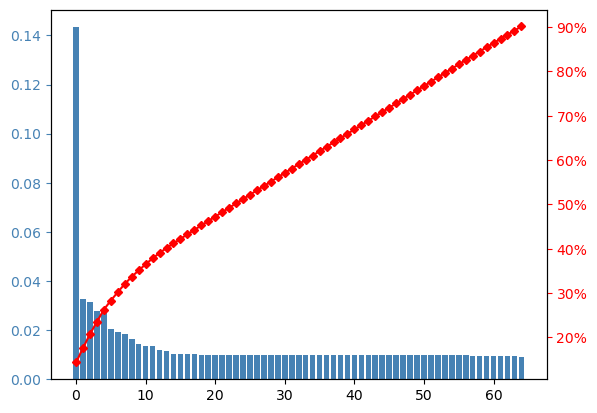

In [11]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

#define aesthetics for plot
color1 = 'steelblue'
color2 = 'red'
line_size = 4

#create basic bar plot
fig, ax = plt.subplots()
ax.bar(df_variance.index, df_variance['variance'], color=color1)

#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(df_variance.index, df_variance['cum_percent'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

#display Pareto chart
plt.show()